In [1]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils import data
from torchvision import models,transforms
import matplotlib.pyplot as plt
import pickle
from collections import OrderedDict
import csv
import collections
from  PIL import Image
from tqdm.notebook import tqdm_notebook
from scipy.spatial import distance
import warnings
warnings.filterwarnings('ignore')
import math
device = torch.device("mps" if torch.has_mps else "cpu")
import resnet50

In [2]:
### load data 
# create df to contain all identities, their image file names, their ethnicities
img_path = 'data/BFW/CROPPED_ALIGNED'
# asian female
asian_female_identities = np.array(next(os.walk(img_path+'/asian_females'))[1])
asian_female_files = np.array([])
asian_female_references = []
for identity in asian_female_identities:
    files = np.sort(next(os.walk(img_path+'/asian_females/'+identity))[2])
    x = img_path+'/asian_females/'+identity +'/'
    files = np.char.add(x,files)
    asian_female_references.append(files[0])
    files = files[1:]
    asian_female_files = np.concatenate((asian_female_files,files))
asian_female_candidates = pd.DataFrame(asian_female_files,columns =['file'])
asian_female_candidates['ethnicity'] = 'asian'
asian_female_candidates['gender'] = 'female'
asian_female_candidates['identity'] = np.repeat(asian_female_identities,24)

asian_female_references = pd.DataFrame(asian_female_references,columns =['file'])
asian_female_references['ethnicity'] = 'asian'
asian_female_references['gender'] = 'female'
asian_female_references['identity'] = asian_female_identities

# black females
black_female_identities = np.array(next(os.walk(img_path+'/black_females'))[1])
black_female_files = np.array([])
black_female_references = []
for identity in black_female_identities:
    files = np.sort(next(os.walk(img_path+'/black_females/'+identity))[2])
    x = img_path+'/black_females/'+identity +'/'
    files = np.char.add(x,files)
    black_female_references.append(files[0])
    files = files[1:]
    black_female_files = np.concatenate((black_female_files,files))
black_female_candidates = pd.DataFrame(black_female_files,columns =['file'])
black_female_candidates['ethnicity'] = 'black'
black_female_candidates['gender'] = 'female'
black_female_candidates['identity'] = np.repeat(black_female_identities,24)


black_female_references = pd.DataFrame(black_female_references,columns =['file'])
black_female_references['ethnicity'] = 'black'
black_female_references['gender'] = 'female'
black_female_references['identity'] = black_female_identities

# indian females
indian_female_identities = np.array(next(os.walk(img_path+'/indian_females'))[1])
indian_female_files = np.array([])
indian_female_references = []
for identity in indian_female_identities:
    files = np.sort(next(os.walk(img_path+'/indian_females/'+identity))[2])
    x = img_path+'/indian_females/'+identity +'/'
    files = np.char.add(x,files)
    indian_female_references.append(files[0])
    files = files[1:]
    indian_female_files = np.concatenate((indian_female_files,files))
indian_female_candidates = pd.DataFrame(indian_female_files,columns =['file'])
indian_female_candidates['ethnicity'] = 'indian'
indian_female_candidates['gender'] = 'female'
indian_female_candidates['identity'] = np.repeat(indian_female_identities,24)


indian_female_references = pd.DataFrame(indian_female_references,columns =['file'])
indian_female_references['ethnicity'] = 'indian'
indian_female_references['gender'] = 'female'
indian_female_references['identity'] = indian_female_identities

# white females
white_female_identities = np.array(next(os.walk(img_path+'/white_females'))[1])
white_female_files = np.array([])
white_female_references = []
for identity in white_female_identities:
    files = np.sort(next(os.walk(img_path+'/white_females/'+identity))[2])
    x = img_path+'/white_females/'+identity +'/'
    files = np.char.add(x,files)
    white_female_references.append(files[0])
    files = files[1:]
    white_female_files = np.concatenate((white_female_files,files))
white_female_candidates = pd.DataFrame(white_female_files,columns =['file'])
white_female_candidates['ethnicity'] = 'white'
white_female_candidates['gender'] = 'female'
white_female_candidates['identity'] = np.repeat(white_female_identities,24)


white_female_references = pd.DataFrame(white_female_references,columns =['file'])
white_female_references['ethnicity'] = 'white'
white_female_references['gender'] = 'female'
white_female_references['identity'] = white_female_identities


# asian males
asian_male_identities = np.array(next(os.walk(img_path+'/asian_males'))[1])
asian_male_files = np.array([])
asian_male_references = []
for identity in asian_male_identities:
    files = np.sort(next(os.walk(img_path+'/asian_males/'+identity))[2])
    x = img_path+'/asian_males/'+identity +'/'
    files = np.char.add(x,files)
    asian_male_references.append(files[0])
    files = files[1:]
    asian_male_files = np.concatenate((asian_male_files,files))
asian_male_candidates = pd.DataFrame(asian_male_files,columns =['file'])
asian_male_candidates['ethnicity'] = 'asian'
asian_male_candidates['gender'] = 'male'
asian_male_candidates['identity'] = np.repeat(asian_male_identities,24)

asian_male_references = pd.DataFrame(asian_male_references,columns =['file'])
asian_male_references['ethnicity'] = 'asian'
asian_male_references['gender'] = 'male'
asian_male_references['identity'] = asian_male_identities

# black males
black_male_identities = np.array(next(os.walk(img_path+'/black_males'))[1])
black_male_files = np.array([])
black_male_references = []
for identity in black_male_identities:
    files = np.sort(next(os.walk(img_path+'/black_males/'+identity))[2])
    x = img_path+'/black_males/'+identity +'/'
    files = np.char.add(x,files)
    black_male_references.append(files[0])
    files = files[1:]
    black_male_files = np.concatenate((black_male_files,files))
black_male_candidates = pd.DataFrame(black_male_files,columns =['file'])
black_male_candidates['ethnicity'] = 'black'
black_male_candidates['gender'] = 'male'
black_male_candidates['identity'] = np.repeat(black_male_identities,24)


black_male_references = pd.DataFrame(black_male_references,columns =['file'])
black_male_references['ethnicity'] = 'black'
black_male_references['gender'] = 'male'
black_male_references['identity'] = black_male_identities

# indian males
indian_male_identities = np.array(next(os.walk(img_path+'/indian_males'))[1])
indian_male_files = np.array([])
indian_male_references = []
for identity in indian_male_identities:
    files = np.sort(next(os.walk(img_path+'/indian_males/'+identity))[2])
    x = img_path+'/indian_males/'+identity +'/'
    files = np.char.add(x,files)
    indian_male_references.append(files[0])
    files = files[1:]
    indian_male_files = np.concatenate((indian_male_files,files))
indian_male_candidates = pd.DataFrame(indian_male_files,columns =['file'])
indian_male_candidates['ethnicity'] = 'indian'
indian_male_candidates['gender'] = 'male'
indian_male_candidates['identity'] = np.repeat(indian_male_identities,24)


indian_male_references = pd.DataFrame(indian_male_references,columns =['file'])
indian_male_references['ethnicity'] = 'indian'
indian_male_references['gender'] = 'male'
indian_male_references['identity'] = indian_male_identities

# white males
white_male_identities = np.array(next(os.walk(img_path+'/white_males'))[1])
white_male_files = np.array([])
white_male_references = []
for identity in white_male_identities:
    files = np.sort(next(os.walk(img_path+'/white_males/'+identity))[2])
    x = img_path+'/white_males/'+identity +'/'
    files = np.char.add(x,files)
    white_male_references.append(files[0])
    files = files[1:]
    white_male_files = np.concatenate((white_male_files,files))
white_male_candidates = pd.DataFrame(white_male_files,columns =['file'])
white_male_candidates['ethnicity'] = 'white'
white_male_candidates['gender'] = 'male'
white_male_candidates['identity'] = np.repeat(white_male_identities,24)


white_male_references = pd.DataFrame(white_male_references,columns =['file'])
white_male_references['ethnicity'] = 'white'
white_male_references['gender'] = 'male'
white_male_references['identity'] = white_male_identities

# all ethnicity
asian_references = pd.concat([asian_male_references,asian_female_references],ignore_index=True)
black_references = pd.concat([black_male_references,black_female_references],ignore_index=True)
indian_references = pd.concat([indian_male_references,indian_female_references],ignore_index=True)
white_references = pd.concat([white_male_references,white_female_references],ignore_index=True)
female_references = pd.concat([asian_female_references,black_female_references,indian_female_references,white_female_references],ignore_index=True)
male_references = pd.concat([asian_male_references,black_male_references,indian_male_references,white_male_references],ignore_index=True)

asian_candidates = pd.concat([asian_male_candidates,asian_female_candidates],ignore_index=True)
black_candidates = pd.concat([black_male_candidates,black_female_candidates],ignore_index=True)
indian_candidates = pd.concat([indian_male_candidates,indian_female_candidates],ignore_index=True)
white_candidates = pd.concat([white_male_candidates,white_female_candidates],ignore_index=True)
female_candidates = pd.concat([asian_female_candidates,black_female_candidates,indian_female_candidates,white_female_candidates],ignore_index=True)
male_candidates = pd.concat([asian_male_candidates,black_male_candidates,indian_male_candidates,white_male_candidates],ignore_index=True)


In [3]:
class BFW_dataset(data.Dataset):
    '''
    This class loads data from dataframes containing images from BFW
    '''
    mean_bgr = np.array([91.4953, 103.8827, 131.0912])  # from resnet50_ft.prototxt

    def __init__(self,img_df):
        """
        :param img_path: dataset directory
        :param img_df: contains image file names and other information
        """
        assert os.path.exists(img_path), "root: {} not found.".format(img_path)
        self.img_df = img_df
        self.img_info = []

        for i, row in self.img_df.iterrows():
            self.img_info.append({
                'img_file': row.file,
                'identity': row.identity,
                'ethnicity': row.ethnicity,
                'gender': row.gender,
            })
            if i % 1000 == 0:
                print("processing: {} images".format(i))

    def __len__(self):
        return len(self.img_info)

    def __getitem__(self, index):
        info = self.img_info[index]
        img_file = info['img_file']
        img = Image.open(img_file)
        img = transforms.Resize(256)(img)
        img = transforms.CenterCrop(224)(img)
        img = np.array(img, dtype=np.uint8)
        assert len(img.shape) == 3  # assumes color images and no alpha channel

        ethnicity = info['ethnicity']
        identity = info['identity']
        gender = info['gender']
        return self.transform(img), identity, ethnicity, gender
  

    def transform(self, img):
        img = img[:, :, ::-1]  # RGB -> BGR
        img = img.astype(np.float32)
        img -= self.mean_bgr
        img = img.transpose(2, 0, 1)  # C x H x W
        img = torch.from_numpy(img).float()
        return img

    def untransform(self, img, lbl):
        img = img.numpy()
        img = img.transpose(1, 2, 0)
        #img += self.mean_bgr
        img = img.astype(np.uint8)
        img = img[:, :, ::-1]
        return img, lbl
def apply_model(model,dataloader,file_prefix,device):
    model.eval()
    outputs = []
    identities = []
    ethnicities = []
    genders = []
    with torch.no_grad():
        for _, (imgs, identityID, ethnicity, gender) in tqdm_notebook(enumerate(dataloader),total=len(dataloader)):
            imgs = imgs.to(device)
            x = model(imgs)
            out = x.view(x.size(0),-1)
            outputs.append(out)
            identities.append(np.array(identityID))
            ethnicities.append(np.array(ethnicity))
            genders.append(np.array(gender))

    outputs=torch.cat(outputs)
    identities= np.concatenate(np.array(identities)).ravel()
    ethnicities= np.concatenate(np.array(ethnicities)).ravel()
    genders= np.concatenate(np.array(genders)).ravel()

    torch.save(outputs, file_prefix + '_outputs.pt')
    np.save(file_prefix + '_identities.npy', identities)
    np.save(file_prefix + '_ethnicities.npy', ethnicities)
    np.save(file_prefix + '_faceIDs.npy', genders)
    return outputs, identities, ethnicities, genders
def corr2_coeff(A, B):
    # Rowwise mean of input arrays & subtract from input arrays themeselves
    A_mA = A - A.mean(1)[:, None]
    B_mB = B - B.mean(1)[:, None]

    # Sum of squares across rows
    ssA = (A_mA**2).sum(1)
    ssB = (B_mB**2).sum(1)

    # Finally get corr coeff
    return torch.matmul(A_mA, B_mB.T) / torch.sqrt(torch.matmul(ssA[:, None],ssB[None]))
def cos_sim(a, b, eps=1e-8):
    """
    added eps for numerical stability
    """
    a_n, b_n = a.norm(dim=1)[:, None], b.norm(dim=1)[:, None]
    a_norm = a / torch.max(a_n, eps * torch.ones_like(a_n))
    b_norm = b / torch.max(b_n, eps * torch.ones_like(b_n))
    sim_mt = torch.mm(a_norm, b_norm.transpose(0, 1))
    return sim_mt
def NIST_verification(similarity_mat, thresh,reference_identities,reference_ethnicities,candidate_identities):
    '''
    both genuine and impostors

    using NIST's metrics for false non match rate and false match rate
    '''
    verification = pd.DataFrame(columns=['reference_identity','reference_ethnicity','TMR','FNMR','TNMR','FMR'])
    match_mat = np.abs(similarity_mat)>=thresh
    for i, identity in enumerate(reference_identities):
        ethnicity = reference_ethnicities[i]
        genuine = np.where(candidate_identities==identity)[0]
        gen_matches = match_mat[i,genuine]

        imposters = np.where(candidate_identities!=identity)[0]
        imp_matches = match_mat[i,imposters]

        TM = np.sum(gen_matches)
        FNM = len(gen_matches)-TM
        TMR = TM/(TM+FNM)
        FNMR = FNM/(TM+FNM)

        FM = np.sum(imp_matches)
        TNM = len(imp_matches)-FM
        FMR = FM/(FM+TNM)
        TNMR = TNM/(FM+TNM)

        row = {'reference_identity': identity,
           'reference_ethnicity': ethnicity, 
           'TMR': TMR,
           'FNMR': FNMR,
           'TNMR': TNMR,
           'FMR': FMR}
        verification = verification.append(row,ignore_index=True)
    return verification

In [4]:
model_ft = resnet50.make_model()
fname = 'weights/resnet50_ft_weight.pkl'

with open(fname, 'rb') as f:
    weights = pickle.load(f, encoding='latin1')

own_state = model_ft.state_dict()
for name, param in weights.items():
    if name in own_state:
        try:
            own_state[name].copy_(torch.from_numpy(param))
        except Exception:
            raise RuntimeError('While copying the parameter named {}, whose dimensions in the model are {} and whose '\
                                'dimensions in the checkpoint are {}.'.format(name, own_state[name].size(), param.shape))
    else:
        raise KeyError('unexpected key "{}" in state_dict'.format(name))
model_ft = model_ft.to(device)

In [5]:
# load reference images
asian_reference_dataset = BFW_dataset(asian_references.reset_index(drop=True))
asian_reference_loader = torch.utils.data.DataLoader(asian_reference_dataset, batch_size=4, shuffle=False)#, **kwargs)

asian_candidate_dataset = BFW_dataset(asian_candidates.reset_index(drop=True))
asian_candidate_loader = torch.utils.data.DataLoader(asian_candidate_dataset, batch_size=4, shuffle=False)#, **kwargs)


asian_reference_outputs, asian_reference_identities, asian_reference_ethnicities, asian_reference_genders = apply_model(model_ft,asian_reference_loader,'outputs/BFW/reference_asian',device)
asian_candidate_outputs, asian_candidate_identities, asian_candidate_ethnicities, asian_candidate_genders = apply_model(model_ft,asian_candidate_loader,'outputs/BFW/candidate_asian',device)

asian_cos = cos_sim(asian_reference_outputs,asian_candidate_outputs).cpu().detach().numpy()

processing: 0 images
processing: 0 images
processing: 1000 images
processing: 2000 images
processing: 3000 images
processing: 4000 images


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/1200 [00:00<?, ?it/s]

In [6]:
# load reference images
black_reference_dataset = BFW_dataset(black_references.reset_index(drop=True))
black_reference_loader = torch.utils.data.DataLoader(black_reference_dataset, batch_size=4, shuffle=False)#, **kwargs)

black_candidate_dataset = BFW_dataset(black_candidates.reset_index(drop=True))
black_candidate_loader = torch.utils.data.DataLoader(black_candidate_dataset, batch_size=4, shuffle=False)#, **kwargs)


black_reference_outputs, black_reference_identities, black_reference_ethnicities, black_reference_genders = apply_model(model_ft,black_reference_loader,'outputs/BFW/reference_black',device)
black_candidate_outputs, black_candidate_identities, black_candidate_ethnicities, black_candidate_genders = apply_model(model_ft,black_candidate_loader,'outputs/BFW/candidate_black',device)

black_cos = cos_sim(black_reference_outputs,black_candidate_outputs).cpu().detach().numpy()

processing: 0 images
processing: 0 images
processing: 1000 images
processing: 2000 images
processing: 3000 images
processing: 4000 images


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/1200 [00:00<?, ?it/s]

In [7]:
# load reference images
indian_reference_dataset = BFW_dataset(indian_references.reset_index(drop=True))
indian_reference_loader = torch.utils.data.DataLoader(indian_reference_dataset, batch_size=4, shuffle=False)#, **kwargs)

indian_candidate_dataset = BFW_dataset(indian_candidates.reset_index(drop=True))
indian_candidate_loader = torch.utils.data.DataLoader(indian_candidate_dataset, batch_size=4, shuffle=False)#, **kwargs)

indian_reference_outputs, indian_reference_identities, indian_reference_ethnicities, indian_reference_genders = apply_model(model_ft,indian_reference_loader,'outputs/BFW/reference_indian',device)
indian_candidate_outputs, indian_candidate_identities, indian_candidate_ethnicities, indian_candidate_genders = apply_model(model_ft,indian_candidate_loader,'outputs/BFW/candidate_indian',device)

indian_cos = cos_sim(indian_reference_outputs,indian_candidate_outputs).cpu().detach().numpy()

processing: 0 images
processing: 0 images
processing: 1000 images
processing: 2000 images
processing: 3000 images
processing: 4000 images


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/1200 [00:00<?, ?it/s]

In [8]:
# load reference images
white_reference_dataset = BFW_dataset(white_references.reset_index(drop=True))
white_reference_loader = torch.utils.data.DataLoader(white_reference_dataset, batch_size=4, shuffle=False)#, **kwargs)

white_candidate_dataset = BFW_dataset(white_candidates.reset_index(drop=True))
white_candidate_loader = torch.utils.data.DataLoader(white_candidate_dataset, batch_size=4, shuffle=False)#, **kwargs)

white_reference_outputs, white_reference_identities, white_reference_ethnicities, white_reference_genders = apply_model(model_ft,white_reference_loader,'outputs/BFW/reference_white',device)
white_candidate_outputs, white_candidate_identities, white_candidate_ethnicities, white_candidate_genders = apply_model(model_ft,white_candidate_loader,'outputs/BFW/candidate_white',device)

white_cos = cos_sim(white_reference_outputs,white_candidate_outputs).cpu().detach().numpy()


processing: 0 images
processing: 0 images
processing: 1000 images
processing: 2000 images
processing: 3000 images
processing: 4000 images


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/1200 [00:00<?, ?it/s]

In [9]:
### asian NIST verificaiton
thresholds = np.arange(0,1.01,0.05)
asian_TMR = []
asian_FMR  = []
asian_TNMR  = []
asian_FNMR  = []
for _, thresh in tqdm_notebook(enumerate(thresholds),total=len(thresholds)):
    cos_verificaiton = NIST_verification(asian_cos, thresh,asian_reference_identities,asian_reference_ethnicities,asian_candidate_identities)
    TMR = np.round(cos_verificaiton.mean(axis=0)['TMR'],4)
    FMR = np.round(cos_verificaiton.mean(axis=0)['FMR'],4)
    TNMR = np.round(cos_verificaiton.mean(axis=0)['TNMR'],4)
    FNMR = np.round(cos_verificaiton.mean(axis=0)['FNMR'],4)

    
    asian_TMR.append(TMR)
    asian_FMR.append(FMR)
    asian_TNMR.append(TNMR)
    asian_FNMR.append(FNMR)

asian_TMR = np.array(asian_TMR)
asian_FMR = np.array(asian_FMR)
asian_TNMR = np.array(asian_TNMR)
asian_FNMR = np.array(asian_FNMR)


  0%|          | 0/21 [00:00<?, ?it/s]

In [10]:
### black NIST verificaiton
thresholds = np.arange(0,1.01,0.05)
black_TMR = []
black_FMR  = []
black_TNMR  = []
black_FNMR  = []
for _, thresh in tqdm_notebook(enumerate(thresholds),total=len(thresholds)):
    cos_verificaiton = NIST_verification(black_cos, thresh,black_reference_identities,black_reference_ethnicities,black_candidate_identities)
    TMR = np.round(cos_verificaiton.mean(axis=0)['TMR'],4)
    FMR = np.round(cos_verificaiton.mean(axis=0)['FMR'],4)
    TNMR = np.round(cos_verificaiton.mean(axis=0)['TNMR'],4)
    FNMR = np.round(cos_verificaiton.mean(axis=0)['FNMR'],4)

    
    black_TMR.append(TMR)
    black_FMR.append(FMR)
    black_TNMR.append(TNMR)
    black_FNMR.append(FNMR)

black_TMR = np.array(black_TMR)
black_FMR = np.array(black_FMR)
black_TNMR = np.array(black_TNMR)
black_FNMR = np.array(black_FNMR)


  0%|          | 0/21 [00:00<?, ?it/s]

In [11]:
### indian NIST verificaiton
thresholds = np.arange(0,1.01,0.05)
indian_TMR = []
indian_FMR  = []
indian_TNMR  = []
indian_FNMR  = []
for _, thresh in tqdm_notebook(enumerate(thresholds),total=len(thresholds)):
    cos_verificaiton = NIST_verification(indian_cos, thresh,indian_reference_identities,indian_reference_ethnicities,indian_candidate_identities)
    TMR = np.round(cos_verificaiton.mean(axis=0)['TMR'],4)
    FMR = np.round(cos_verificaiton.mean(axis=0)['FMR'],4)
    TNMR = np.round(cos_verificaiton.mean(axis=0)['TNMR'],4)
    FNMR = np.round(cos_verificaiton.mean(axis=0)['FNMR'],4)

    
    indian_TMR.append(TMR)
    indian_FMR.append(FMR)
    indian_TNMR.append(TNMR)
    indian_FNMR.append(FNMR)

indian_TMR = np.array(indian_TMR)
indian_FMR = np.array(indian_FMR)
indian_TNMR = np.array(indian_TNMR)
indian_FNMR = np.array(indian_FNMR)


  0%|          | 0/21 [00:00<?, ?it/s]

In [12]:
### white NIST verificaiton
thresholds = np.arange(0,1.01,0.05)
white_TMR = []
white_FMR  = []
white_TNMR  = []
white_FNMR  = []
for _, thresh in tqdm_notebook(enumerate(thresholds),total=len(thresholds)):
    cos_verificaiton = NIST_verification(white_cos, thresh,white_reference_identities,white_reference_ethnicities,white_candidate_identities)
    TMR = np.round(cos_verificaiton.mean(axis=0)['TMR'],4)
    FMR = np.round(cos_verificaiton.mean(axis=0)['FMR'],4)
    TNMR = np.round(cos_verificaiton.mean(axis=0)['TNMR'],4)
    FNMR = np.round(cos_verificaiton.mean(axis=0)['FNMR'],4)

    
    white_TMR.append(TMR)
    white_FMR.append(FMR)
    white_TNMR.append(TNMR)
    white_FNMR.append(FNMR)

white_TMR = np.array(white_TMR)
white_FMR = np.array(white_FMR)
white_TNMR = np.array(white_TNMR)
white_FNMR = np.array(white_FNMR)


  0%|          | 0/21 [00:00<?, ?it/s]

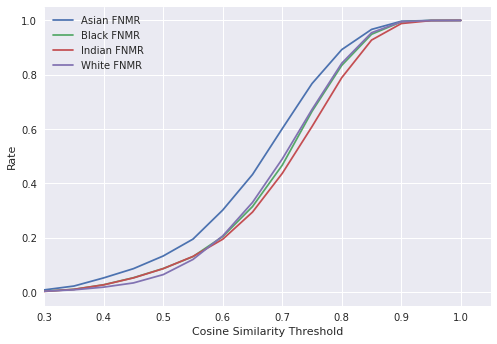

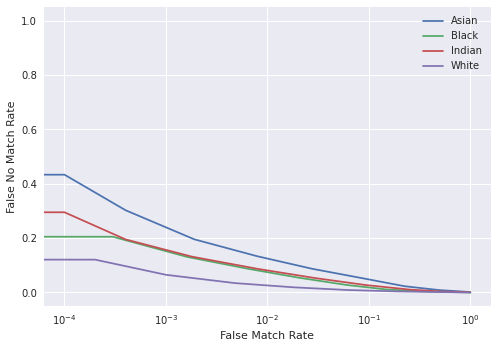

In [47]:
with plt.style.context('seaborn'):    
    plt.plot(thresholds,asian_FNMR,label='Asian FNMR')
    plt.plot(thresholds,black_FNMR,label='Black FNMR')
    plt.plot(thresholds,indian_FNMR,label='Indian FNMR')
    plt.plot(thresholds,white_FNMR,label='White FNMR')


    plt.xlabel('Cosine Similarity Threshold')
    plt.ylabel('Rate')
    plt.xlim(0.3)
    plt.legend()
plt.show()
with plt.style.context('seaborn'):    
    # plt.plot(thresholds,african_FNMR,label='African FNMR')
    plt.plot((asian_FMR),asian_FNMR,label='Asian')
    plt.plot((black_FMR),black_FNMR,label='Black')
    plt.plot((indian_FMR),indian_FNMR,label='Indian')
    plt.plot((white_FMR),white_FNMR,label='White')
  


    plt.xlabel('False Match Rate')
    plt.ylabel('False No Match Rate')
    plt.legend()
    plt.xscale('log')
plt.show()

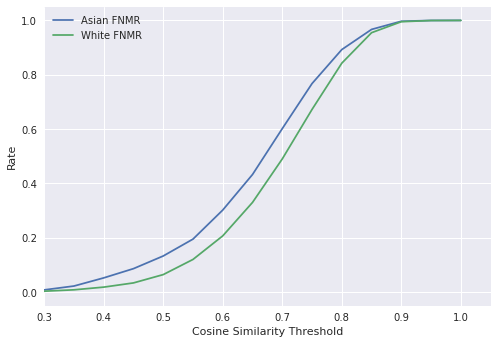

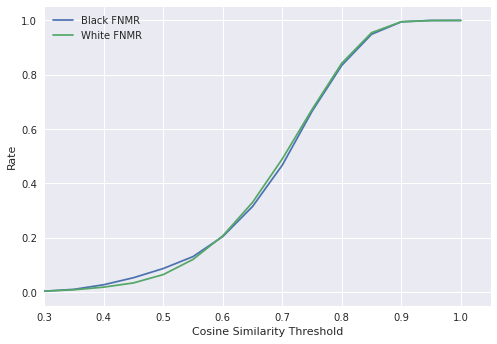

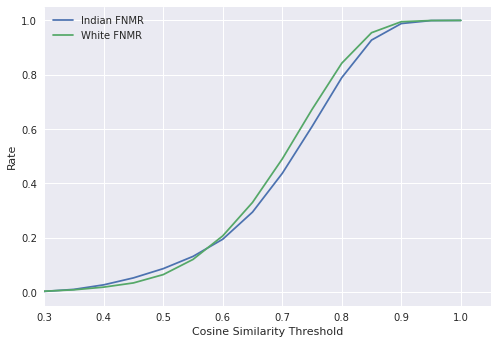

In [15]:
with plt.style.context('seaborn'):    
    plt.plot(thresholds,asian_FNMR,label='Asian FNMR')
    plt.plot(thresholds,white_FNMR,label='White FNMR')
    plt.xlabel('Cosine Similarity Threshold')
    plt.ylabel('Rate')
    plt.xlim(0.3)
    plt.legend()
plt.show()
with plt.style.context('seaborn'):    
    plt.plot(thresholds,black_FNMR,label='Black FNMR')
    plt.plot(thresholds,white_FNMR,label='White FNMR')
    plt.xlabel('Cosine Similarity Threshold')
    plt.ylabel('Rate')
    plt.xlim(0.3)
    plt.legend()
plt.show()

with plt.style.context('seaborn'):    
    plt.plot(thresholds,indian_FNMR,label='Indian FNMR')
    plt.plot(thresholds,white_FNMR,label='White FNMR')
    plt.xlabel('Cosine Similarity Threshold')
    plt.ylabel('Rate')
    plt.xlim(0.3)
    plt.legend()
plt.show()


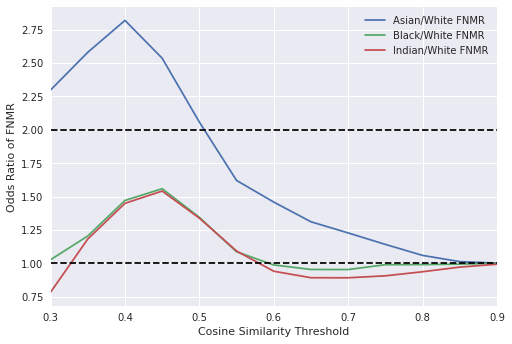

In [25]:
# odds ratio

with plt.style.context('seaborn'):    
    plt.plot(thresholds,asian_FNMR/white_FNMR,label='Asian/White FNMR')
    plt.plot(thresholds,black_FNMR/white_FNMR,label='Black/White FNMR')
    plt.plot(thresholds,indian_FNMR/white_FNMR,label='Indian/White FNMR')
    
    plt.xlabel('Cosine Similarity Threshold')
    plt.ylabel('Odds Ratio of FNMR')
    plt.xlim(0.3,0.9)
    plt.axhline(y=1,linestyle='--',color='black')
    plt.axhline(y=2,linestyle='--',color='black')
    plt.legend()
plt.show()
# with plt.style.context('seaborn'):    
#     plt.plot(thresholds,black_FNMR/white_FNMR,label='Black/White FNMR')
#     plt.xlabel('Cosine Similarity Threshold')
#     plt.ylabel('Odds Ratio of FNMR')
#     plt.xlim(0.3)
#     plt.legend()
# plt.show()

# with plt.style.context('seaborn'):    
#     plt.plot(thresholds,indian_FNMR/white_FNMR,label='Indian/White FNMR')
#     plt.xlabel('Cosine Similarity Threshold')
#     plt.ylabel('Odds Ratio of FNMR')
#     plt.xlim(0.3)
#     plt.legend()
# plt.show()


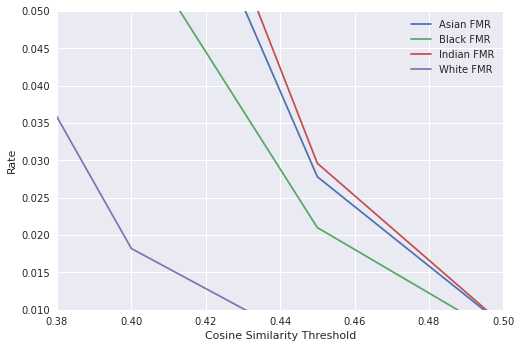

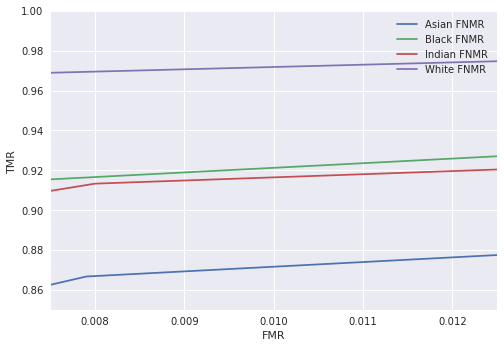

In [37]:
with plt.style.context('seaborn'):    
    plt.plot(thresholds,asian_FMR,label='Asian FMR')
    plt.plot(thresholds,black_FMR,label='Black FMR')
    plt.plot(thresholds,indian_FMR,label='Indian FMR')
    plt.plot(thresholds,white_FMR,label='White FMR')


    plt.xlabel('Cosine Similarity Threshold')
    plt.ylabel('Rate')
    plt.legend()
    plt.ylim(0.01,0.05)
    plt.xlim(0.38,0.5)
plt.show()
with plt.style.context('seaborn'):    
    plt.plot(asian_FMR,asian_TMR,label='Asian FNMR')
    plt.plot(black_FMR,black_TMR,label='Black FNMR')
    plt.plot(indian_FMR,indian_TMR,label='Indian FNMR')
    plt.plot(white_FMR,white_TMR,label='White FNMR')

    plt.xlim(0.0075,0.0125)
    plt.ylim(0.85,1)     
    plt.xlabel('FMR')
    plt.ylabel('TMR')
    plt.legend()
plt.show()

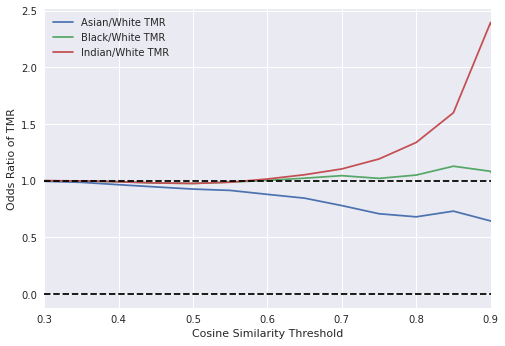

In [42]:
with plt.style.context('seaborn'):    
    plt.plot(thresholds,asian_TMR/white_TMR,label='Asian/White TMR')
    plt.plot(thresholds,black_TMR/white_TMR,label='Black/White TMR')
    plt.plot(thresholds,indian_TMR/white_TMR,label='Indian/White TMR')
    
    plt.xlabel('Cosine Similarity Threshold')
    plt.ylabel('Odds Ratio of TMR')
    plt.xlim(0.3,0.9)
    plt.axhline(y=1,linestyle='--',color='black')
    plt.axhline(y=0,linestyle='--',color='black')
    plt.legend()
plt.show()

In [43]:
# load female images
female_reference_dataset = BFW_dataset(female_references.reset_index(drop=True))
female_reference_loader = torch.utils.data.DataLoader(female_reference_dataset, batch_size=4, shuffle=False)#, **kwargs)

female_candidate_dataset = BFW_dataset(female_candidates.reset_index(drop=True))
female_candidate_loader = torch.utils.data.DataLoader(female_candidate_dataset, batch_size=4, shuffle=False)#, **kwargs)

female_reference_outputs, female_reference_identities, female_reference_ethnicities, female_reference_genders = apply_model(model_ft,female_reference_loader,'outputs/BFW/reference_female',device)
female_candidate_outputs, female_candidate_identities, female_candidate_ethnicities, female_candidate_genders = apply_model(model_ft,female_candidate_loader,'outputs/BFW/candidate_female',device)

female_cos = cos_sim(female_reference_outputs,female_candidate_outputs).cpu().detach().numpy()

processing: 0 images
processing: 0 images
processing: 1000 images
processing: 2000 images
processing: 3000 images
processing: 4000 images
processing: 5000 images
processing: 6000 images
processing: 7000 images
processing: 8000 images
processing: 9000 images


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/2400 [00:00<?, ?it/s]

In [44]:
# load male images
male_reference_dataset = BFW_dataset(male_references.reset_index(drop=True))
male_reference_loader = torch.utils.data.DataLoader(male_reference_dataset, batch_size=4, shuffle=False)#, **kwargs)

male_candidate_dataset = BFW_dataset(male_candidates.reset_index(drop=True))
male_candidate_loader = torch.utils.data.DataLoader(male_candidate_dataset, batch_size=4, shuffle=False)#, **kwargs)

male_reference_outputs, male_reference_identities, male_reference_ethnicities, male_reference_genders = apply_model(model_ft,male_reference_loader,'outputs/BFW/reference_male',device)
male_candidate_outputs, male_candidate_identities, male_candidate_ethnicities, male_candidate_genders = apply_model(model_ft,male_candidate_loader,'outputs/BFW/candidate_male',device)

male_cos = cos_sim(male_reference_outputs,male_candidate_outputs).cpu().detach().numpy()

processing: 0 images
processing: 0 images
processing: 1000 images
processing: 2000 images
processing: 3000 images
processing: 4000 images
processing: 5000 images
processing: 6000 images
processing: 7000 images
processing: 8000 images
processing: 9000 images


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/2400 [00:00<?, ?it/s]

In [52]:
### female NIST verificaiton
thresholds = np.arange(0,1.01,0.01)
female_TMR = []
female_FMR  = []
female_TNMR  = []
female_FNMR  = []
for _, thresh in tqdm_notebook(enumerate(thresholds),total=len(thresholds)):
    cos_verificaiton = NIST_verification(female_cos, thresh,female_reference_identities,female_reference_ethnicities,female_candidate_identities)
    TMR = np.round(cos_verificaiton.mean(axis=0)['TMR'],4)
    FMR = np.round(cos_verificaiton.mean(axis=0)['FMR'],4)
    TNMR = np.round(cos_verificaiton.mean(axis=0)['TNMR'],4)
    FNMR = np.round(cos_verificaiton.mean(axis=0)['FNMR'],4)

    
    female_TMR.append(TMR)
    female_FMR.append(FMR)
    female_TNMR.append(TNMR)
    female_FNMR.append(FNMR)

female_TMR = np.array(female_TMR)
female_FMR = np.array(female_FMR)
female_TNMR = np.array(female_TNMR)
female_FNMR = np.array(female_FNMR)


  0%|          | 0/101 [00:00<?, ?it/s]

In [53]:
### male NIST verificaiton
thresholds = np.arange(0,1.01,0.01)
male_TMR = []
male_FMR  = []
male_TNMR  = []
male_FNMR  = []
for _, thresh in tqdm_notebook(enumerate(thresholds),total=len(thresholds)):
    cos_verificaiton = NIST_verification(male_cos, thresh,male_reference_identities,male_reference_ethnicities,male_candidate_identities)
    TMR = np.round(cos_verificaiton.mean(axis=0)['TMR'],4)
    FMR = np.round(cos_verificaiton.mean(axis=0)['FMR'],4)
    TNMR = np.round(cos_verificaiton.mean(axis=0)['TNMR'],4)
    FNMR = np.round(cos_verificaiton.mean(axis=0)['FNMR'],4)

    
    male_TMR.append(TMR)
    male_FMR.append(FMR)
    male_TNMR.append(TNMR)
    male_FNMR.append(FNMR)

male_TMR = np.array(male_TMR)
male_FMR = np.array(male_FMR)
male_TNMR = np.array(male_TNMR)
male_FNMR = np.array(male_FNMR)


  0%|          | 0/101 [00:00<?, ?it/s]

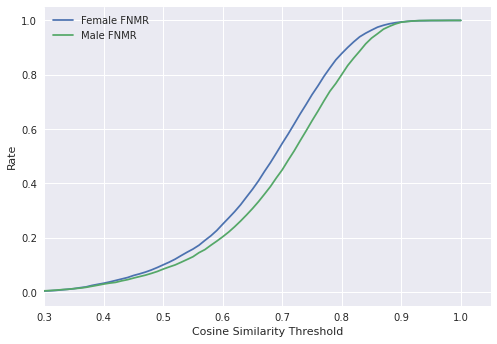

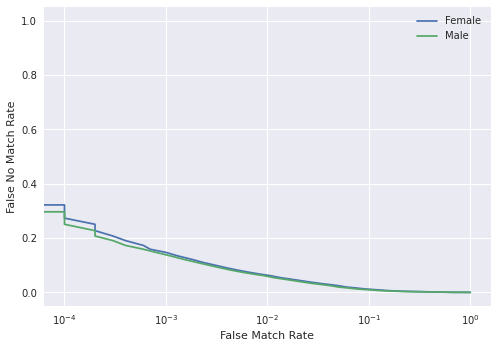

In [54]:
with plt.style.context('seaborn'):    
    plt.plot(thresholds,female_FNMR,label='Female FNMR')
    plt.plot(thresholds,male_FNMR,label='Male FNMR')


    plt.xlabel('Cosine Similarity Threshold')
    plt.ylabel('Rate')
    plt.xlim(0.3)
    plt.legend()
plt.show()
with plt.style.context('seaborn'):    
    # plt.plot(thresholds,african_FNMR,label='African FNMR')
    plt.plot((female_FMR),female_FNMR,label='Female')
    plt.plot((male_FMR),female_FNMR,label='Male')
  


    plt.xlabel('False Match Rate')
    plt.ylabel('False No Match Rate')
    plt.legend()
    plt.xscale('log')
plt.show()

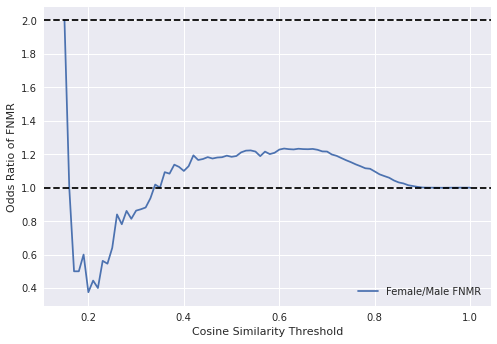

In [55]:
# odds ratio
with plt.style.context('seaborn'):    
    plt.plot(thresholds,female_FNMR/male_FNMR,label='Female/Male FNMR')

    
    plt.xlabel('Cosine Similarity Threshold')
    plt.ylabel('Odds Ratio of FNMR')

    plt.axhline(y=1,linestyle='--',color='black')
    plt.axhline(y=2,linestyle='--',color='black')
    plt.legend()
plt.show()